<a href="https://colab.research.google.com/github/nura6199/my-dissertation/blob/main/EnsembleHybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier












from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
from google.colab import files
uploaded = files.upload()

Saving chronic_kidney_disease.csv to chronic_kidney_disease.csv


In [4]:
# Load the dataset
data = pd.read_csv('chronic_kidney_disease.csv')

preprocessing steps

In [5]:
# Handling missing values
data = data.replace('?', pd.NA)
data = data.dropna()


In [6]:
# Convert categorical variables to numerical using LabelEncoder
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [7]:
# Separate features and labels
X = data.drop('class', axis=1)
y = data['class']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature Selection using Extra Trees Classifier:
We will use the Extra Trees Classifier to select important features from the dataset.

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

# Create the Extra Trees Classifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [11]:
# Fit the model and get feature importances
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [12]:
# Select important features
important_features_indices = et_clf.feature_importances_.argsort()[::-1]
important_features = X.columns[important_features_indices]
num_features_to_select = 10  # You can choose any number of top features


In [13]:
# Select the top 'num_features_to_select' features
selected_features = important_features[:num_features_to_select]

In [14]:
# Filter the data to keep only the selected features
X_train_selected = X_train[:, important_features_indices[:num_features_to_select]]
X_test_selected = X_test[:, important_features_indices[:num_features_to_select]]

Implementing Naive Bayes, SVM, and Decision Tree classifiers:

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [16]:
# Initialize classifiers
nb_clf = GaussianNB()
svm_clf = SVC(probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

In [17]:
# Train and predict using Naive Bayes
nb_clf.fit(X_train_selected, y_train)
nb_y_pred = nb_clf.predict(X_test_selected)


In [18]:
# Train and predict using SVM
svm_clf.fit(X_train_selected, y_train)
svm_y_pred = svm_clf.predict(X_test_selected)

In [19]:
# Train and predict using Decision Tree
dt_clf.fit(X_train_selected, y_train)
dt_y_pred = dt_clf.predict(X_test_selected)

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate accuracy for each classifier
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1_score = f1_score(y_test, nb_y_pred)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1_score = f1_score(y_test, svm_y_pred)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1_score = f1_score(y_test, dt_y_pred)

In [21]:
# Generate confusion matrix for each classifier
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

In [22]:
# Generate ROC curve and calculate ROC-AUC score for each classifier
nb_y_prob = nb_clf.predict_proba(X_test_selected)[:, 1]
svm_y_prob = svm_clf.predict_proba(X_test_selected)[:, 1]
dt_y_prob = dt_clf.predict_proba(X_test_selected)[:, 1]

nb_roc_auc = roc_auc_score(y_test, nb_y_prob)
svm_roc_auc = roc_auc_score(y_test, svm_y_prob)
dt_roc_auc = roc_auc_score(y_test, dt_y_prob)

fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_y_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_y_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_y_prob)

Implementing Hybrid Ensemble Learning:
For hybrid ensemble learning, we'll combine the predictions of Naive Bayes, SVM, and Decision Tree using a voting classifier.

In [23]:
from sklearn.ensemble import VotingClassifier

# Create the voting ensemble
voting_clf = VotingClassifier(estimators=[('nb', nb_clf), ('svm', svm_clf), ('dt', dt_clf)], voting='soft')


In [24]:
# Train and predict using the voting ensemble
voting_clf.fit(X_train_selected, y_train)
voting_y_pred = voting_clf.predict(X_test_selected)

In [25]:
# Calculate accuracy for the voting ensemble
voting_accuracy = accuracy_score(y_test, voting_y_pred)

# Calculate precision for the voting ensemble
voting_precision = precision_score(y_test, voting_y_pred)

# Calculate recall for the voting ensemble
voting_recall = recall_score(y_test, voting_y_pred)

# Calculate F1-score for the voting ensemble
voting_f1_score = f1_score(y_test, voting_y_pred)

In [26]:
# Generate confusion matrix for the voting ensemble
voting_conf_matrix = confusion_matrix(y_test, voting_y_pred)


In [27]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Naive Bayes
nb_cv_scores = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
nb_cv_precision = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='precision')
nb_cv_recall = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='recall')
nb_cv_f1_score = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
svm_cv_precision = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='precision')
svm_cv_recall = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='recall')
svm_cv_f1_score = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
dt_cv_precision = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='precision')
dt_cv_recall = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='recall')
dt_cv_f1_score = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for Voting Ensemble
voting_cv_scores = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
voting_cv_precision = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='precision')
voting_cv_recall = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='recall')
voting_cv_f1_score = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Print the average cross-validation scores for each classifier
print("Cross-Validation Results:")
print("Naive Bayes:")
print(f"Accuracy: {nb_cv_scores.mean():.2f}")
print(f"Precision: {nb_cv_precision.mean():.2f}")
print(f"Recall: {nb_cv_recall.mean():.2f}")
print(f"F1-score: {nb_cv_f1_score.mean():.2f}")
print()

print("SVM:")
print(f"Accuracy: {svm_cv_scores.mean():.2f}")
print(f"Precision: {svm_cv_precision.mean():.2f}")
print(f"Recall: {svm_cv_recall.mean():.2f}")
print(f"F1-score: {svm_cv_f1_score.mean():.2f}")
print()

print("Decision Tree:")
print(f"Accuracy: {dt_cv_scores.mean():.2f}")
print(f"Precision: {dt_cv_precision.mean():.2f}")
print(f"Recall: {dt_cv_recall.mean():.2f}")
print(f"F1-score: {dt_cv_f1_score.mean():.2f}")
print()

print("Voting Ensemble:")
print(f"Accuracy: {voting_cv_scores.mean():.2f}")
print(f"Precision: {voting_cv_precision.mean():.2f}")
print(f"Recall: {voting_cv_recall.mean():.2f}")
print(f"F1-score: {voting_cv_f1_score.mean():.2f}")


Cross-Validation Results:
Naive Bayes:
Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1-score: 0.96

SVM:
Accuracy: 0.97
Precision: 0.99
Recall: 0.96
F1-score: 0.97

Decision Tree:
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1-score: 0.99

Voting Ensemble:
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1-score: 0.98


In [28]:
# Generate ROC curve and calculate ROC-AUC score for the voting ensemble
voting_y_prob = voting_clf.predict_proba(X_test_selected)[:, 1]
voting_roc_auc = roc_auc_score(y_test, voting_y_prob)
fpr_voting, tpr_voting, _ = roc_curve(y_test, voting_y_prob)

Plotting ROC curves and Confusion matrices:
Now, let's plot the ROC curves and confusion matrices for each classifier, including the hybrid ensemble learning model.

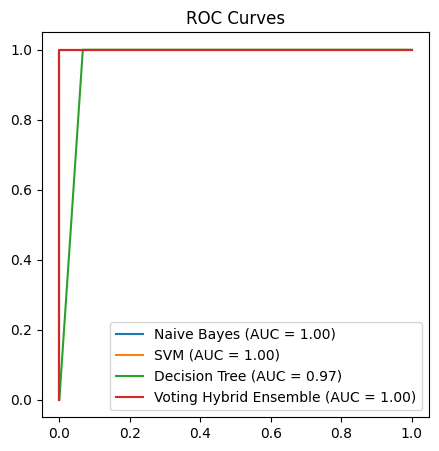

In [43]:
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(5, 5))
plot_roc_curve(fpr_nb, tpr_nb, nb_roc_auc, 'Naive Bayes')
plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, 'SVM')
plot_roc_curve(fpr_dt, tpr_dt, dt_roc_auc, 'Decision Tree')
plot_roc_curve(fpr_voting, tpr_voting, voting_roc_auc, 'Voting Hybrid Ensemble')
#plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
#plt.grid()
plt.show()



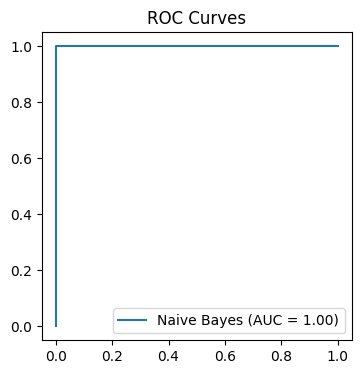

In [31]:
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(4, 4))
plot_roc_curve(fpr_nb, tpr_nb, nb_roc_auc, 'Naive Bayes')
#plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, 'SVM')
#plot_roc_curve(fpr_dt, tpr_dt, dt_roc_auc, 'Decision Tree')
#plot_roc_curve(fpr_voting, tpr_voting, voting_roc_auc, 'Voting Ensemble')
#plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
#plt.grid()
plt.show()

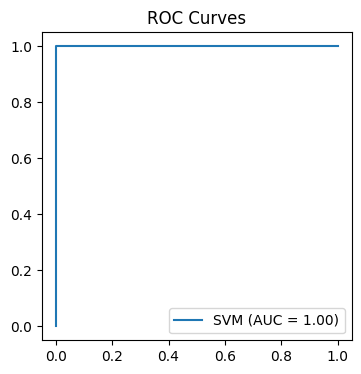

In [32]:
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(4, 4))
#plot_roc_curve(fpr_nb, tpr_nb, nb_roc_auc, 'Naive Bayes')
plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, 'SVM')
#plot_roc_curve(fpr_dt, tpr_dt, dt_roc_auc, 'Decision Tree')
#plot_roc_curve(fpr_voting, tpr_voting, voting_roc_auc, 'Voting Ensemble')
#plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
#plt.grid()
plt.show()

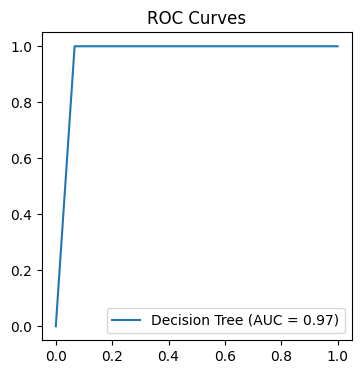

In [33]:
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(4, 4))
#plot_roc_curve(fpr_nb, tpr_nb, nb_roc_auc, 'Naive Bayes')
#plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, 'SVM')
plot_roc_curve(fpr_dt, tpr_dt, dt_roc_auc, 'Decision Tree')
#plot_roc_curve(fpr_voting, tpr_voting, voting_roc_auc, 'Voting Ensemble')
#plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
#plt.grid()
plt.show()

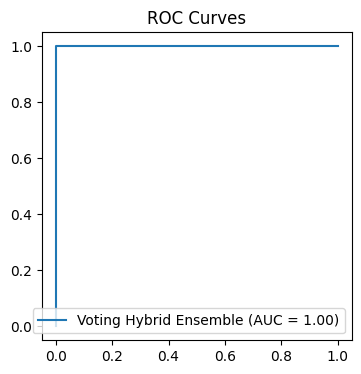

In [44]:
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(4, 4))
#plot_roc_curve(fpr_nb, tpr_nb, nb_roc_auc, 'Naive Bayes')
#plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, 'SVM')
#plot_roc_curve(fpr_dt, tpr_dt, dt_roc_auc, 'Decision Tree')
plot_roc_curve(fpr_voting, tpr_voting, voting_roc_auc, 'Voting Hybrid Ensemble')
#plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
#plt.grid()
plt.show()

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xticks([0, 1], ['Not CKD', 'CKD'])  # Complete the line to add 'CKD' label
    plt.yticks([0, 1], ['Not CKD', 'CKD'])  # Add y-axis labels as well
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

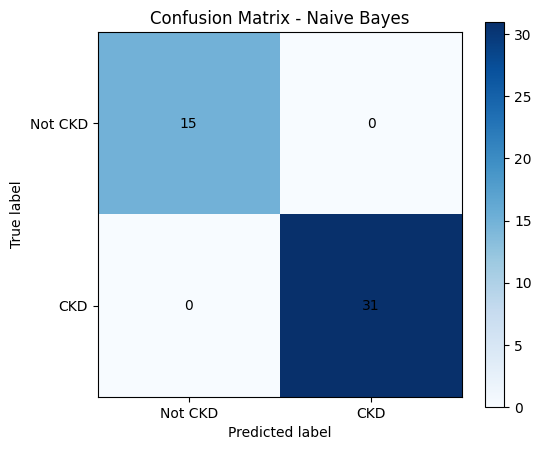

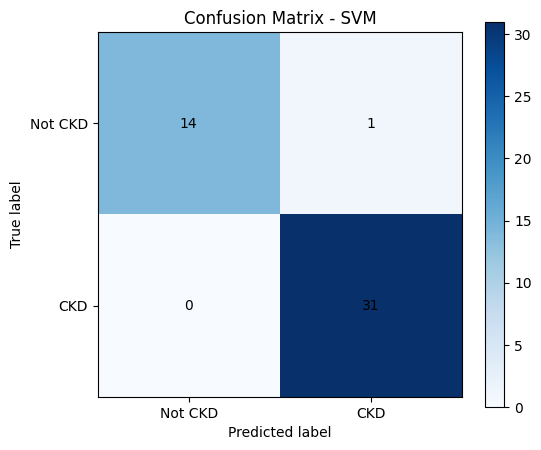

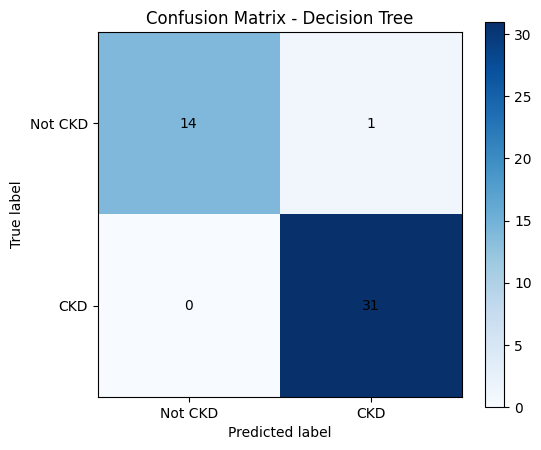

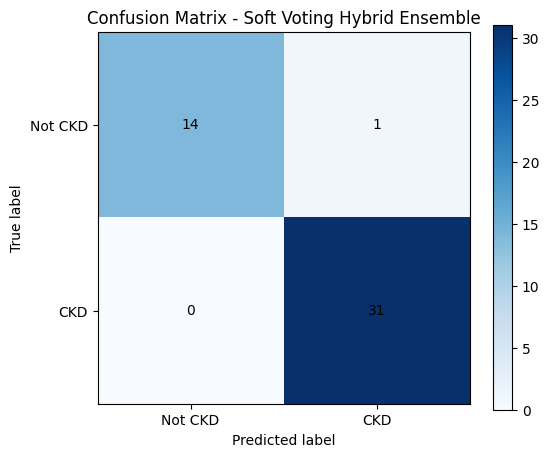

In [40]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xticks([0, 1], ['Not CKD', 'CKD'])
    plt.yticks([0, 1], ['Not CKD', 'CKD'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)

    # Annotate the confusion matrix cells with values
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", verticalalignment="center")

    plt.show()

# Plot confusion matrices
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_confusion_matrix(nb_conf_matrix, title='Confusion Matrix - Naive Bayes')

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_confusion_matrix(svm_conf_matrix, title='Confusion Matrix - SVM')

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 3)
plot_confusion_matrix(dt_conf_matrix, title='Confusion Matrix - Decision Tree')

plt.figure(figsize=(6, 5))
plot_confusion_matrix(voting_conf_matrix, title='Confusion Matrix - Soft Voting Hybrid Ensemble')

In [41]:
# Print accuracy, precision, recall, and F1-score for each classifier
print("Naive Bayes:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1-score: {nb_f1_score:.2f}")
print()

print("SVM:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1_score:.2f}")
print()

print("Decision Tree:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1-score: {dt_f1_score:.2f}")
print()

print("Voting Ensemble:")
print(f"Accuracy: {voting_accuracy:.2f}")
print(f"Precision: {voting_precision:.2f}")
print(f"Recall: {voting_recall:.2f}")
print(f"F1-score: {voting_f1_score:.2f}")


Naive Bayes:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

SVM:
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1-score: 0.98

Decision Tree:
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1-score: 0.98

Voting Ensemble:
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1-score: 0.98


In [42]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Naive Bayes
nb_cv_scores = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
nb_cv_precision = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='precision')
nb_cv_recall = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='recall')
nb_cv_f1_score = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
svm_cv_precision = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='precision')
svm_cv_recall = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='recall')
svm_cv_f1_score = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
dt_cv_precision = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='precision')
dt_cv_recall = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='recall')
dt_cv_f1_score = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for Voting Ensemble
voting_cv_scores = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
voting_cv_precision = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='precision')
voting_cv_recall = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='recall')
voting_cv_f1_score = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Print the average cross-validation scores for each classifier
print("Cross-Validation Results:")
print("Naive Bayes:")
print(f"Accuracy: {nb_cv_scores.mean():.2f}")
print(f"Precision: {nb_cv_precision.mean():.2f}")
print(f"Recall: {nb_cv_recall.mean():.2f}")
print(f"F1-score: {nb_cv_f1_score.mean():.2f}")
print()

print("SVM:")
print(f"Accuracy: {svm_cv_scores.mean():.2f}")
print(f"Precision: {svm_cv_precision.mean():.2f}")
print(f"Recall: {svm_cv_recall.mean():.2f}")
print(f"F1-score: {svm_cv_f1_score.mean():.2f}")
print()

print("Decision Tree:")
print(f"Accuracy: {dt_cv_scores.mean():.2f}")
print(f"Precision: {dt_cv_precision.mean():.2f}")
print(f"Recall: {dt_cv_recall.mean():.2f}")
print(f"F1-score: {dt_cv_f1_score.mean():.2f}")
print()

print("Voting Ensemble:")
print(f"Accuracy: {voting_cv_scores.mean():.2f}")
print(f"Precision: {voting_cv_precision.mean():.2f}")
print(f"Recall: {voting_cv_recall.mean():.2f}")
print(f"F1-score: {voting_cv_f1_score.mean():.2f}")


Cross-Validation Results:
Naive Bayes:
Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1-score: 0.96

SVM:
Accuracy: 0.97
Precision: 0.99
Recall: 0.96
F1-score: 0.97

Decision Tree:
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1-score: 0.99

Voting Ensemble:
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1-score: 0.98
